# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create lists to hold the info that I ask
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []


counter = 0
set_counter = 1
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
 
    if counter < 50:
        counter += 1
    else:
        set_counter += 1
        counter = 0

    print(f'Processing record {counter} of set {set_counter} | {city}')
    
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed']) 
        new_cities.append(city)
    except:
        print("City not found! Skipping...")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
------------------------
Processing record 1 of set 1 | haines junction
Processing record 2 of set 1 | guerrero negro
Processing record 3 of set 1 | punta arenas
Processing record 4 of set 1 | atuona
Processing record 5 of set 1 | georgetown
Processing record 6 of set 1 | torbay
Processing record 7 of set 1 | waltershausen
Processing record 8 of set 1 | ilulissat
Processing record 9 of set 1 | kapaa
Processing record 10 of set 1 | samalaeulu
City not found! Skipping...
Processing record 11 of set 1 | carnarvon
Processing record 12 of set 1 | cabadiangan
Processing record 13 of set 1 | esperance
Processing record 14 of set 1 | evensk
Processing record 15 of set 1 | sovetskaya gavan
Processing record 16 of set 1 | faanui
Processing record 17 of set 1 | ahipara
Processing record 18 of set 1 | port alfred
Processing record 19 of set 1 | wulanhaote
City not found! Skipping...
Processing record 20 of set 1 | namibe
Processing record 21 of set 1 | rikitea
Processing r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = pd.DataFrame ({
    "City":new_cities,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Temp":temp,
    "Lat":lat,
    "Lng":lng,   
    "Wind Speed":wind
})
weather_data.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Temp          563
Lat           563
Lng           563
Wind Speed    563
dtype: int64

In [6]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,haines junction,99,CA,1585258769,73,-0.67,60.75,-137.51,2.90
1,guerrero negro,100,MX,1585258770,59,16.80,27.98,-114.06,10.00
2,punta arenas,90,CL,1585258719,87,8.00,-53.15,-70.92,8.20
3,atuona,1,PF,1585258772,74,27.86,-9.80,-139.03,5.61
4,georgetown,20,MY,1585258755,94,27.00,5.41,100.34,1.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

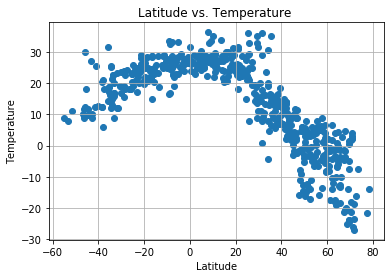

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Temp"])
plt.grid()
plt.title("Latitude vs. Temperature ")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

#### Latitude vs. Humidity Plot

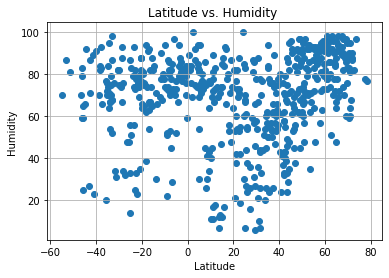

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"])
plt.grid()
plt.title("Latitude vs. Humidity ")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

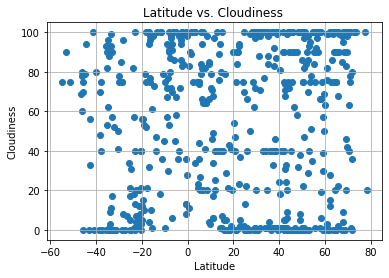

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])
plt.grid()
plt.title("Latitude vs. Cloudiness ")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

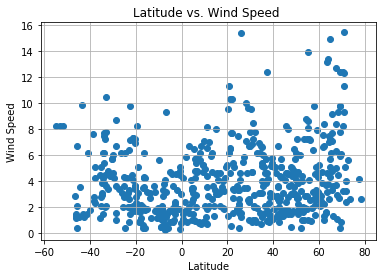

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"])
plt.grid()
plt.title("Latitude vs. Wind Speed ")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern Hemisphere DataFrames
n_df =weather_data.loc[weather_data["Lat"] >= 0]
n_df.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,haines junction,99,CA,1585258769,73,-0.67,60.75,-137.51,2.90
1,guerrero negro,100,MX,1585258770,59,16.80,27.98,-114.06,10.00
4,georgetown,20,MY,1585258755,94,27.00,5.41,100.34,1.00
5,torbay,90,CA,1585258773,92,-1.67,47.67,-52.73,5.10
6,waltershausen,47,DE,1585258773,57,5.00,50.90,10.57,2.68


In [12]:
# Create Southern Hemisphere DataFrames
s_df =weather_data.loc[weather_data["Lat"] < 0]
s_df.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
2,punta arenas,90,CL,1585258719,87,8.00,-53.15,-70.92,8.20
3,atuona,1,PF,1585258772,74,27.86,-9.80,-139.03,5.61
9,carnarvon,31,AU,1585258775,83,26.00,-24.87,113.63,6.20
11,esperance,9,AU,1585258776,54,21.20,-33.87,121.90,7.50
14,faanui,98,PF,1585258776,67,28.36,-16.48,-151.75,4.31


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8828144372627897


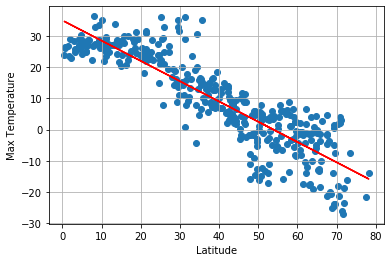

In [13]:
#Get the regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_df["Lat"], n_df["Temp"])
regress_values = n_df["Lat"] * slope + intercept
#show the plot
plt.scatter(n_df["Lat"], n_df["Temp"])
plt.plot(n_df["Lat"],regress_values,color="red")
plt.grid()
#plt.xlim(0, 80)
#plt.ylim(0, 110)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7102849156765695


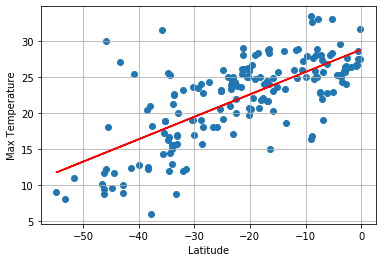

In [14]:
#Get the regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_df["Lat"], s_df["Temp"])
regress_values = s_df["Lat"] * slope + intercept
#show the plot
plt.scatter(s_df["Lat"], s_df["Temp"])
plt.plot(s_df["Lat"],regress_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue}")
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.33793691018693645


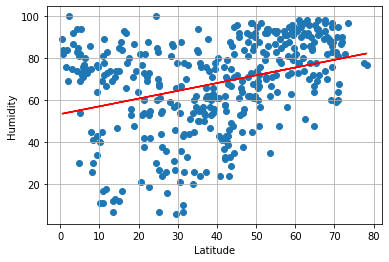

In [15]:
#Get the regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_df["Lat"], n_df["Humidity"])
regress_values = n_df["Lat"] * slope + intercept
#show the plot
plt.scatter(n_df["Lat"], n_df["Humidity"])
plt.grid()
plt.plot(n_df["Lat"],regress_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11226320114299321


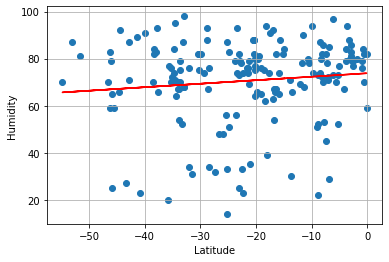

In [16]:
#Get the regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_df["Lat"], s_df["Humidity"])
regress_values = s_df["Lat"] * slope + intercept
#show the plot
plt.scatter(s_df["Lat"], s_df["Humidity"])
plt.grid()
plt.plot(s_df["Lat"],regress_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.056519396358848534


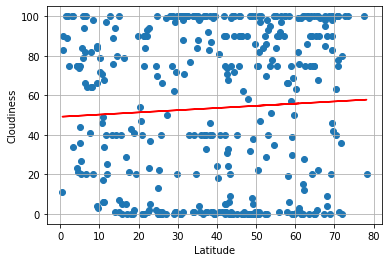

In [17]:
#Get the regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_df["Lat"], n_df["Cloudiness"])
regress_values = n_df["Lat"] * slope + intercept
#show the plot
plt.scatter(n_df["Lat"], n_df["Cloudiness"])
plt.grid()
plt.plot(n_df["Lat"],regress_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19775998055241178


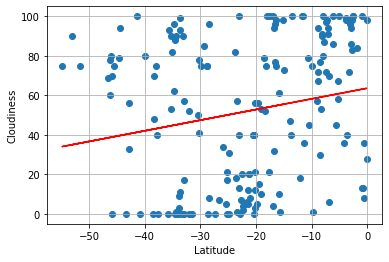

In [18]:
#Get the regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_df["Lat"], s_df["Cloudiness"])
regress_values = s_df["Lat"] * slope + intercept
#show the plot
plt.scatter(s_df["Lat"], s_df["Cloudiness"])
plt.grid()
plt.plot(s_df["Lat"],regress_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17244897816957222


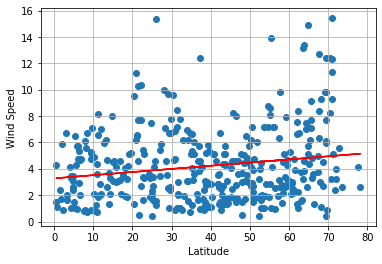

In [19]:
#Get the regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_df["Lat"], n_df["Wind Speed"])
regress_values = n_df["Lat"] * slope + intercept
#show the plot
plt.scatter(n_df["Lat"], n_df["Wind Speed"])
plt.grid()
plt.plot(n_df["Lat"],regress_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.32524394547768515


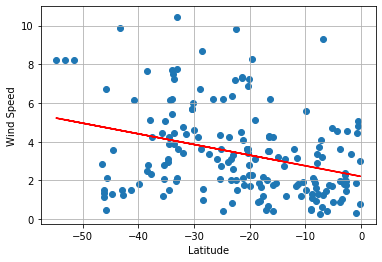

In [20]:
#Get the regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_df["Lat"], s_df["Wind Speed"])
regress_values = s_df["Lat"] * slope + intercept
#show the plot
plt.scatter(s_df["Lat"], s_df["Wind Speed"])
plt.grid()
plt.plot(s_df["Lat"],regress_values,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()